# CS381/780 Data Analytics Final Project

### Due on 5/19/2021 23:59 pm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [5]:
# for z score
from scipy import stats
# for data normalization
from sklearn.preprocessing import MaxAbsScaler
import random

### Dataset is based on an original student performance dataset provided on Kaggle

https://www.kaggle.com/impapan/student-performance-data-set


### I have modified the original dataset slightly, removed some attributes and include the first term grade from the language course


In [6]:
df = pd.read_csv("student_performance_modified.csv")
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,...,paid,activities,higher,internet,famrel,freetime,Dalc,Walc,health,Math_FinalG3
0,18.0,2,2,0,6,5.0,0,F,U,GT3,...,no,no,yes,no,4,3,1,1,3,6
1,17.0,1,2,0,4,5.0,9,F,U,GT3,...,no,no,yes,yes,5,3,1,1,3,6
2,15.0,1,2,3,10,7.0,12,F,U,LE3,...,yes,no,yes,yes,4,3,2,3,3,10
3,15.0,1,3,0,2,15.0,14,F,U,GT3,...,yes,yes,yes,yes,3,2,1,1,5,15
4,16.0,1,2,0,4,6.0,11,F,U,GT3,...,yes,no,yes,no,4,3,1,2,5,10


In [6]:
df.columns

Index(['age', 'traveltime', 'studytime', 'failures', 'absences', 'Math_G1',
       'Language_G1', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'schoolsup', 'famsup', 'paid', 'activities', 'higher',
       'internet', 'famrel', 'freetime', 'Dalc', 'Walc', 'health',
       'Math_FinalG3'],
      dtype='object')

### First we replace the Math_FinalG3 by a binary label to indicate underperformance

In [7]:
df['underperformance'] = df['Math_FinalG3'].apply(lambda x: 1 if x < 9 else 0)
df = df.drop(['Math_FinalG3'], axis=1)
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,...,paid,activities,higher,internet,famrel,freetime,Dalc,Walc,health,underperformance
0,18.0,2,2,0,6,5.0,0,F,U,GT3,...,no,no,yes,no,4,3,1,1,3,1
1,17.0,1,2,0,4,5.0,9,F,U,GT3,...,no,no,yes,yes,5,3,1,1,3,1
2,15.0,1,2,3,10,7.0,12,F,U,LE3,...,yes,no,yes,yes,4,3,2,3,3,0
3,15.0,1,3,0,2,15.0,14,F,U,GT3,...,yes,yes,yes,yes,3,2,1,1,5,0
4,16.0,1,2,0,4,6.0,11,F,U,GT3,...,yes,no,yes,no,4,3,1,2,5,0


### Your task in the final project is build the best predictive model to predict who would underperform in their final Math Grade so that the school can proactively find ways to help the students

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.

### Math_G1 is the Math Grade in first term and Language_G1 is the first term grade in language. Math_G1 should have a high correlation of the Student Final Math Grade. However, it won't be available at the beginning of the school year

### Therefore, you need to build two sets of models. One set is not to use these G1 varaibles, the others you could. Find out if the language grade will be useful or not in determining the final Math grade

### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


<AxesSubplot:xlabel='underperformance', ylabel='count'>

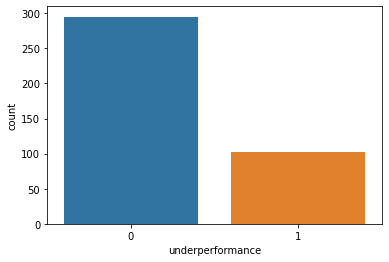

In [8]:
sns.countplot(df['underperformance'])

### Good Luck !!!

Show all your work below

## EDA Phase

### Find/replace nulls

In [7]:
df.isnull().any()

age                  True
traveltime          False
studytime           False
failures            False
absences            False
Math_G1              True
Language_G1         False
sex                 False
address             False
famsize             False
Pstatus             False
Medu                False
Fedu                False
Mjob                False
Fjob                False
schoolsup           False
famsup              False
paid                False
activities          False
higher              False
internet            False
famrel              False
freetime            False
Dalc                False
Walc                False
health              False
underperformance    False
dtype: bool

## Setup dummy variables to take care categorical variables

In [8]:
# remove NA
# I've opted to just delete them. 
# Benefits: easy and quick. Drawbacks: am deleteing data and may mess up the distribution. Oh well.
orig_df = df
orig_df.dropna(inplace=True)

# dummy variables
# all other variables are either numeric or boolean.
orig_df = orig_df.join(pd.get_dummies(df['Mjob'], prefix='Mjob'))
orig_df = orig_df.join(pd.get_dummies(df['Fjob'], prefix='Fjob'))
orig_df = orig_df.join(pd.get_dummies(df['famsize']))
orig_df = orig_df.join(pd.get_dummies(df['sex']))
orig_df = orig_df.join(pd.get_dummies(df['Pstatus']))
orig_df = orig_df.join(pd.get_dummies(df['address']))
orig_df = orig_df.drop(['sex', 'famsize', 'address','Pstatus','Mjob', 'Fjob'],axis=1)

# go from string yes/no to boolean
yes_no_features = ['schoolsup','famsup','paid','activities','higher','internet']
for feat in yes_no_features:
    orig_df[feat] = orig_df[feat].apply(lambda x: 1 if x=='yes' else 0)

df = orig_df

In [9]:
# rename columns that aren't self documented/self explanatory
df = df.rename(columns={'F':'female','M':'male','A':'apart','T':'together','R':'rural','U':'urban'})

In [12]:
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,schoolsup,...,Fjob_services,Fjob_teacher,GT3,LE3,female,male,apart,together,rural,urban
0,18.0,2,2,0,6,5.0,0,4,4,1,...,0,1,1,0,1,0,1,0,0,1
1,17.0,1,2,0,4,5.0,9,1,1,0,...,0,0,1,0,1,0,0,1,0,1
2,15.0,1,2,3,10,7.0,12,1,1,1,...,0,0,0,1,1,0,0,1,0,1
3,15.0,1,3,0,2,15.0,14,4,2,0,...,1,0,1,0,1,0,0,1,0,1
4,16.0,1,2,0,4,6.0,11,3,3,0,...,0,0,1,0,1,0,0,1,0,1


In [9]:
df.columns

Index(['age', 'traveltime', 'studytime', 'failures', 'absences', 'Math_G1',
       'Language_G1', 'Medu', 'Fedu', 'schoolsup', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'famrel', 'freetime', 'Dalc',
       'Walc', 'health', 'underperformance', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'GT3',
       'LE3', 'female', 'male', 'apart', 'together', 'rural', 'urban'],
      dtype='object')

### Check for outliers
#### If they are more than 4 standard deviations away, I am just going to get rid of them. Garbage in, garbage out. If the data is more than 4 standard deviations away, it is an outlier should not be used in our model.

In [35]:
df.shape

(396, 39)

### I have opted to remove all values that are more than 5 standard deviations. Even if these are valid data (i.e not garbage prof. put in) I do not want them in my model. These are outliers, and are not the norm, and are not inidicitive of the average student. In addition, this should remove any garbage data that the professor put in. In addition, with high level discussion with classmates, I can confirm that all garbage data was removed.

In [10]:
threshold = 5
z = np.abs(stats.zscore(df))
print(np.where(z > threshold))
df = df[(z < threshold).all(axis=1)]

(array([ 39,  75, 184, 277], dtype=int64), array([0, 4, 4, 4], dtype=int64))


In [37]:
df.shape

(392, 39)

In [17]:
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,schoolsup,...,Fjob_services,Fjob_teacher,GT3,LE3,female,male,apart,together,rural,urban
1,17.0,1,2,0,4,5.0,9,1,1,0,...,0,0,1,0,1,0,0,1,0,1
2,15.0,1,2,3,10,7.0,12,1,1,1,...,0,0,0,1,1,0,0,1,0,1
3,15.0,1,3,0,2,15.0,14,4,2,0,...,1,0,1,0,1,0,0,1,0,1
4,16.0,1,2,0,4,6.0,11,3,3,0,...,0,0,1,0,1,0,0,1,0,1
5,16.0,1,2,0,10,15.0,12,4,3,0,...,0,0,0,1,0,1,0,1,0,1


## Perform basic exploration of relationship, with plots and graphs

In [18]:
df.corr()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,schoolsup,...,Fjob_services,Fjob_teacher,GT3,LE3,female,male,apart,together,rural,urban
age,1.000000,0.065650,0.055244,0.147419,0.134141,-0.017707,0.026539,-0.128800,-0.102031,-0.249130,...,0.018949,-0.070749,-0.054237,0.054237,0.045793,-0.045793,-0.046123,0.046123,0.171364,-0.171364
traveltime,0.065650,1.000000,-0.071282,0.090194,-0.024809,-0.084351,-0.038680,-0.181557,-0.152713,0.006585,...,-0.076798,0.008031,-0.047491,0.047491,-0.055284,0.055284,-0.032307,0.032307,0.320026,-0.320026
studytime,0.055244,-0.071282,1.000000,-0.133587,-0.103581,0.110916,0.050751,0.069156,-0.035916,-0.006181,...,0.063206,-0.053150,0.060865,-0.060865,0.259406,-0.259406,-0.051360,0.051360,0.017751,-0.017751
failures,0.147419,0.090194,-0.133587,1.000000,0.107015,-0.333396,-0.108779,-0.208573,-0.187281,0.009520,...,0.083568,-0.057942,0.041391,-0.041391,0.016462,-0.016462,0.024622,-0.024622,0.102752,-0.102752
absences,0.134141,-0.024809,-0.103581,0.107015,1.000000,-0.029925,-0.020201,0.117515,0.020391,-0.000009,...,-0.087045,-0.000101,-0.067300,0.067300,0.019325,-0.019325,0.094220,-0.094220,0.009475,-0.009475
Math_G1,-0.017707,-0.084351,0.110916,-0.333396,-0.029925,1.000000,0.339118,0.252062,0.210320,-0.218092,...,0.011141,0.217672,-0.086495,0.086495,-0.167861,0.167861,0.040276,-0.040276,-0.097242,0.097242
Language_G1,0.026539,-0.038680,0.050751,-0.108779,-0.020201,0.339118,1.000000,0.121724,0.121296,-0.168554,...,-0.049358,0.081050,0.034784,-0.034784,0.034743,-0.034743,0.089540,-0.089540,-0.018319,0.018319
Medu,-0.128800,-0.181557,0.069156,-0.208573,0.117515,0.252062,0.121724,1.000000,0.623602,-0.073973,...,-0.024297,0.263294,-0.009668,0.009668,-0.108846,0.108846,0.093088,-0.093088,-0.142284,0.142284
Fedu,-0.102031,-0.152713,-0.035916,-0.187281,0.020391,0.210320,0.121296,0.623602,1.000000,0.000851,...,0.047200,0.367198,0.034823,-0.034823,-0.083408,0.083408,0.100533,-0.100533,-0.061430,0.061430
schoolsup,-0.249130,0.006585,-0.006181,0.009520,-0.000009,-0.218092,-0.168554,-0.073973,0.000851,1.000000,...,-0.020393,0.059450,0.003524,-0.003524,0.112791,-0.112791,0.032029,-0.032029,-0.022312,0.022312


In [19]:
df.corr().filter(items=['underperformance']).sort_values('underperformance', ascending=False, key = abs)

,underperformance
underperformance,1.000000
Math_G1,-0.615771
failures,0.331362
Language_G1,-0.184336
Medu,-0.178097
Fedu,-0.155579
rural,0.117484
urban,-0.117484
Mjob_other,0.104834
female,0.101295


#### I am going to use all variables since that is what professor requested. But We can see how some of these attributes will probably not be very helpful.

In [20]:
# sns.pairplot(df, hue='underperformance')

#### My machine is not powerful enough to do this entire pairplot (only 8gb ram. Just ordered more). Here's a subset where the attribute's correlation on the underperformance is at least 0.10

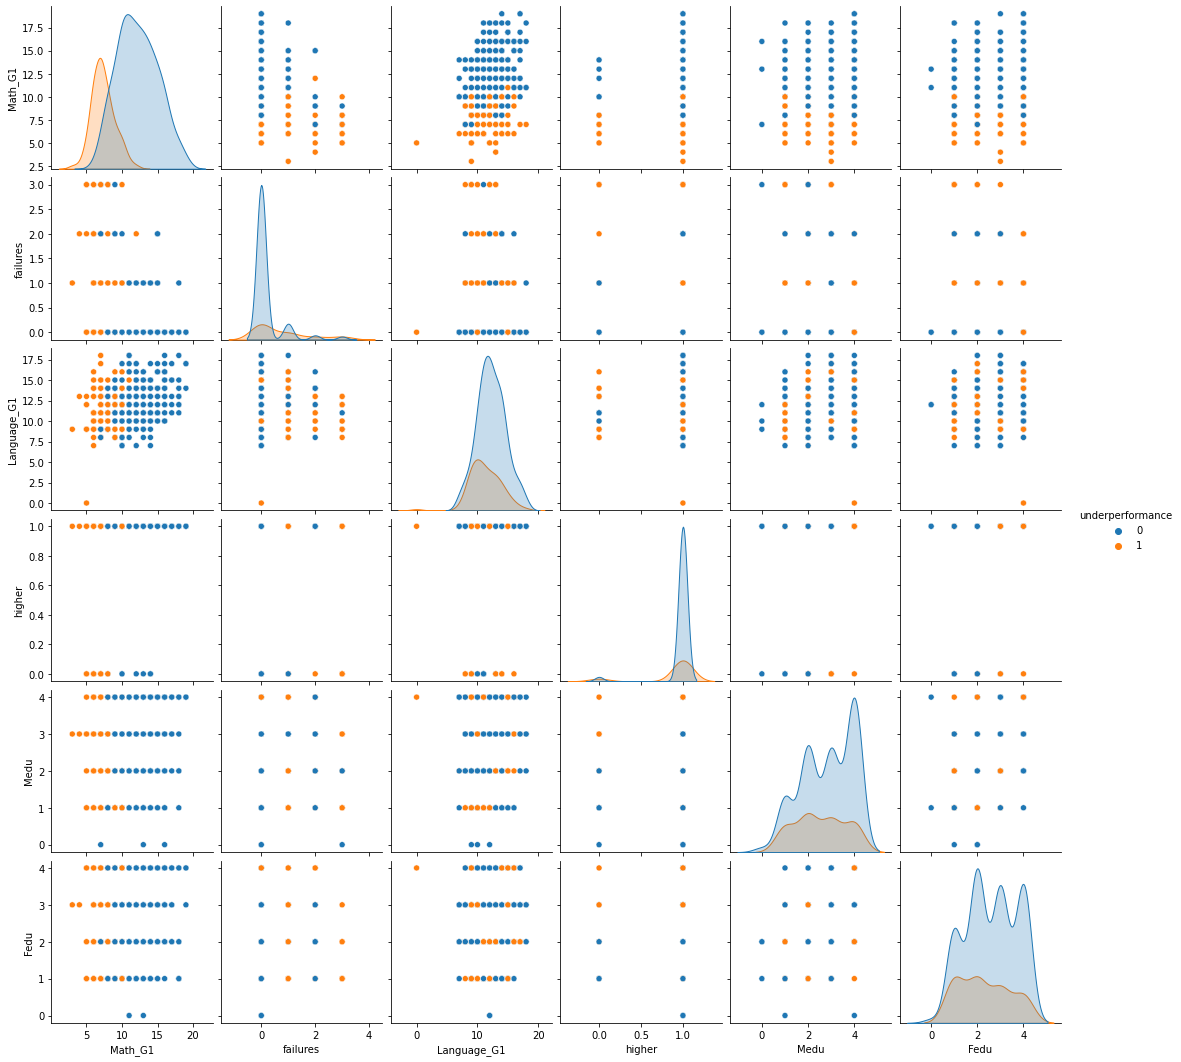

In [11]:
df_temp = df[['Math_G1','failures','Language_G1','higher','Medu','Fedu','underperformance']]
sns.pairplot(df_temp, hue='underperformance')

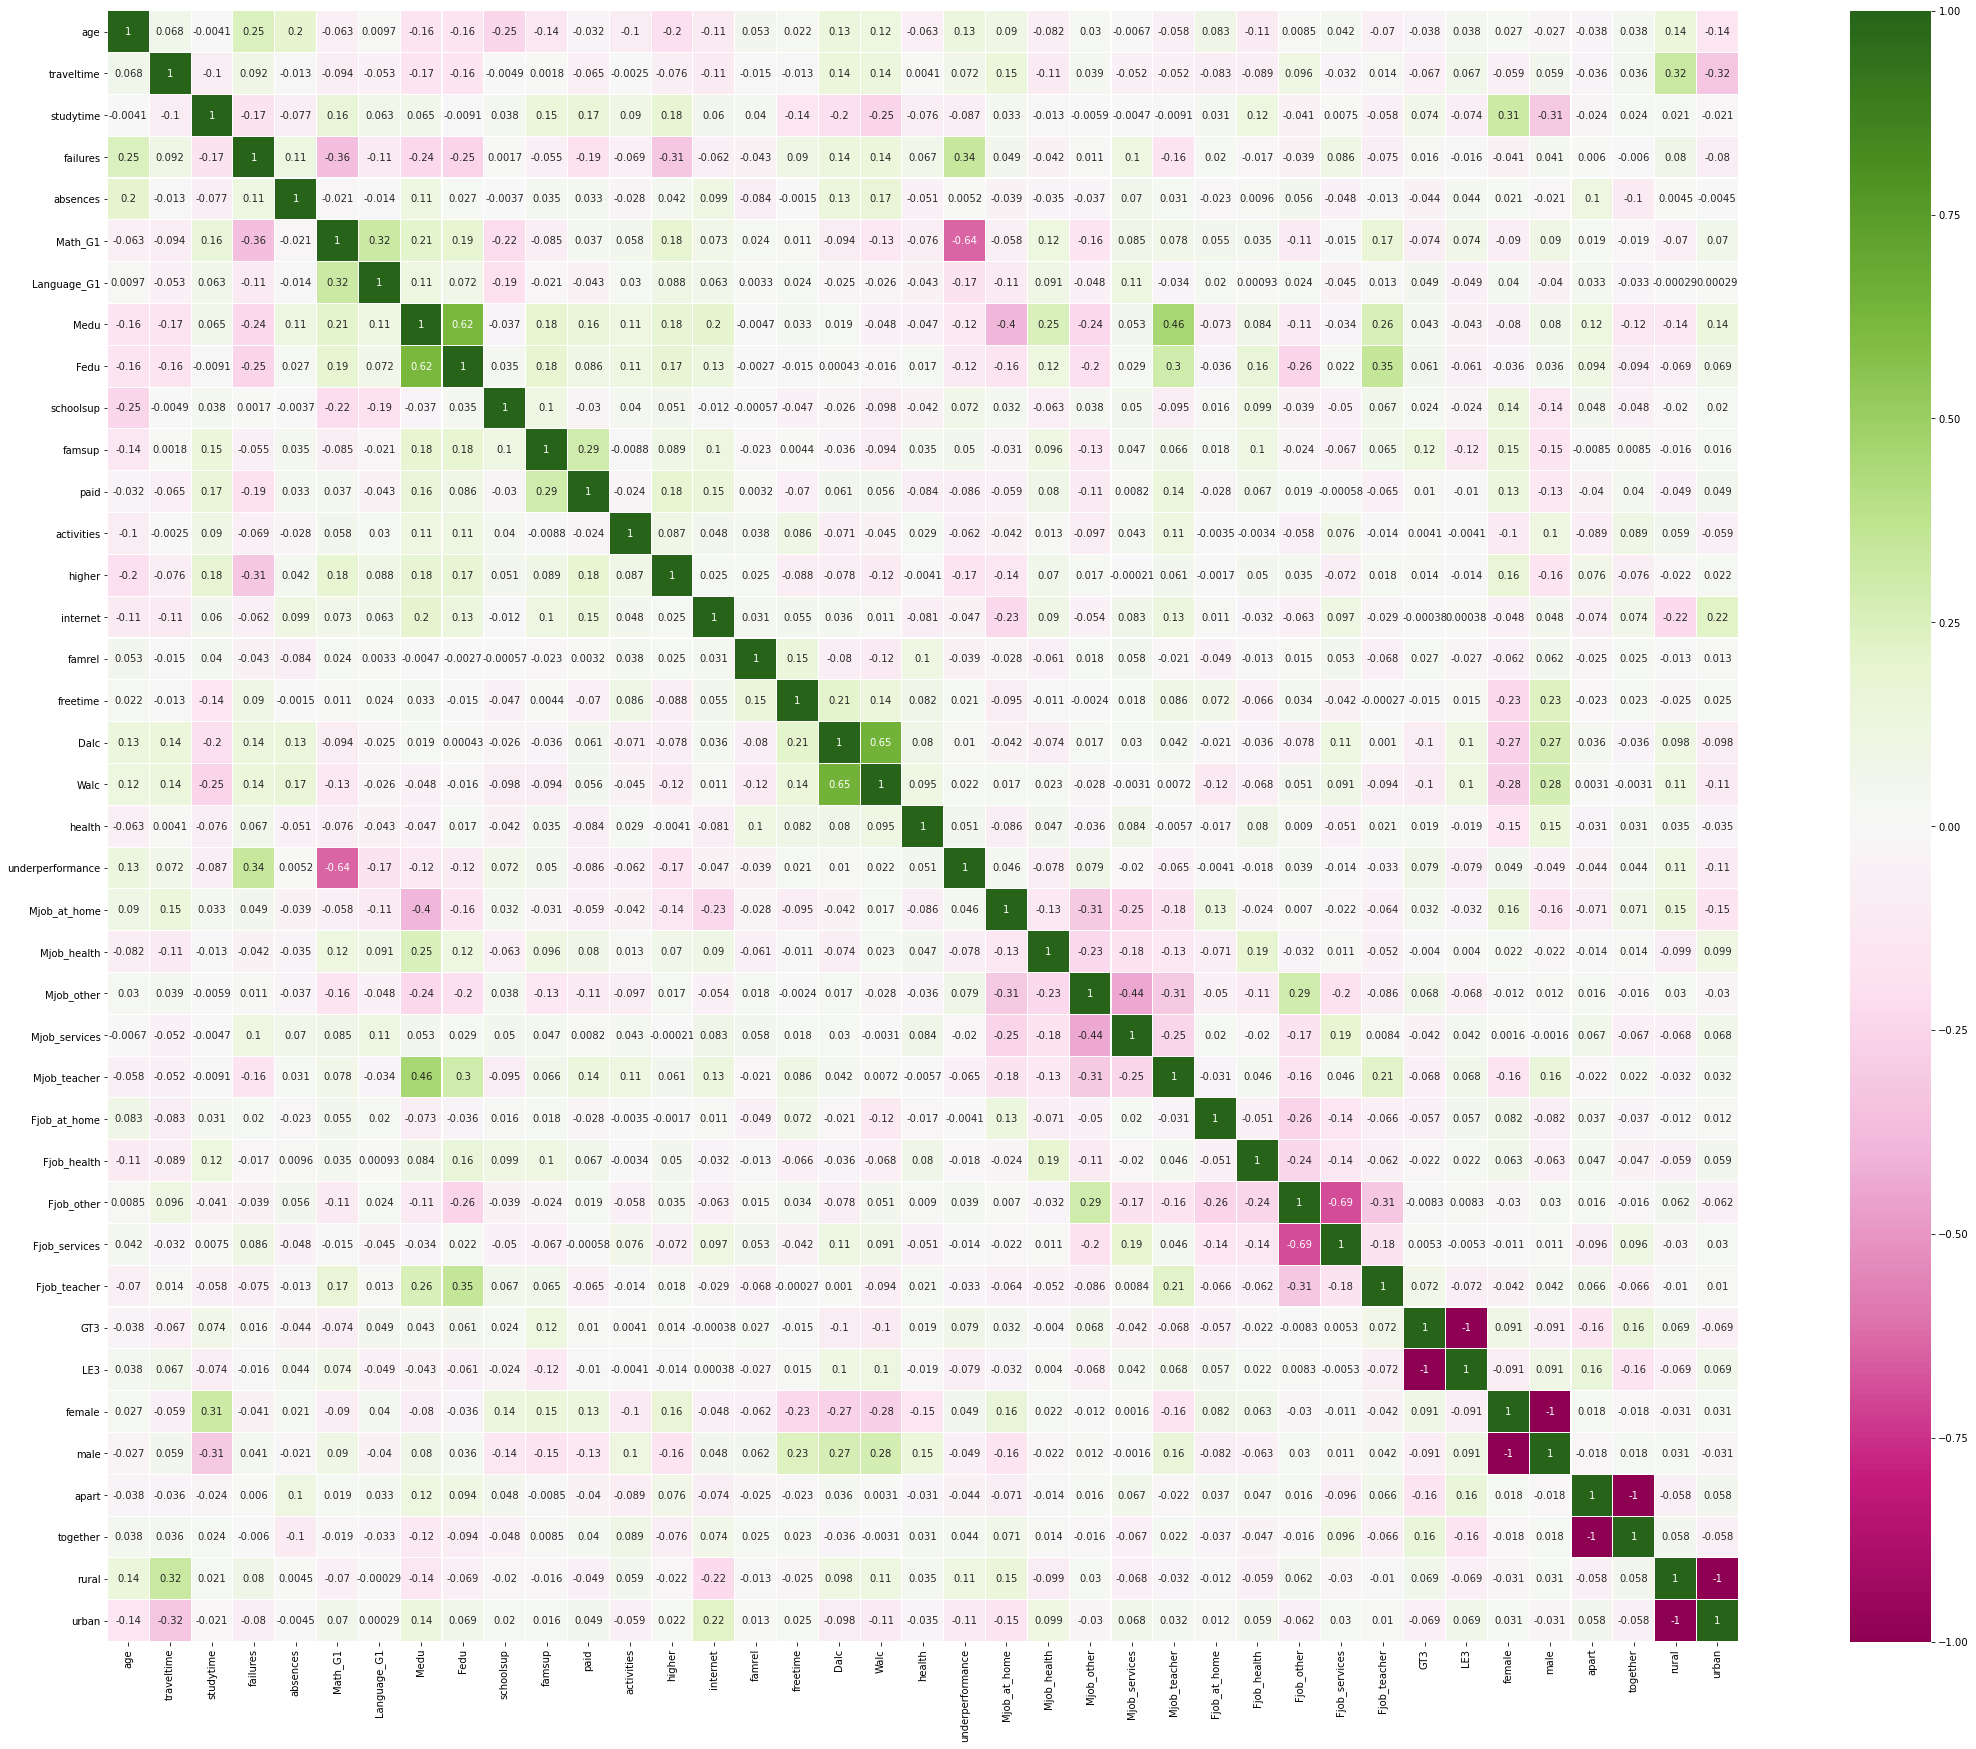

In [17]:
fig,ax = plt.subplots(1,1,figsize=(40,30))
sns.heatmap(df.corr(), square=True, linewidth=0.1, cmap="PiYG", ax=ax, annot=True, center=0)
plt.show()

<AxesSubplot:>

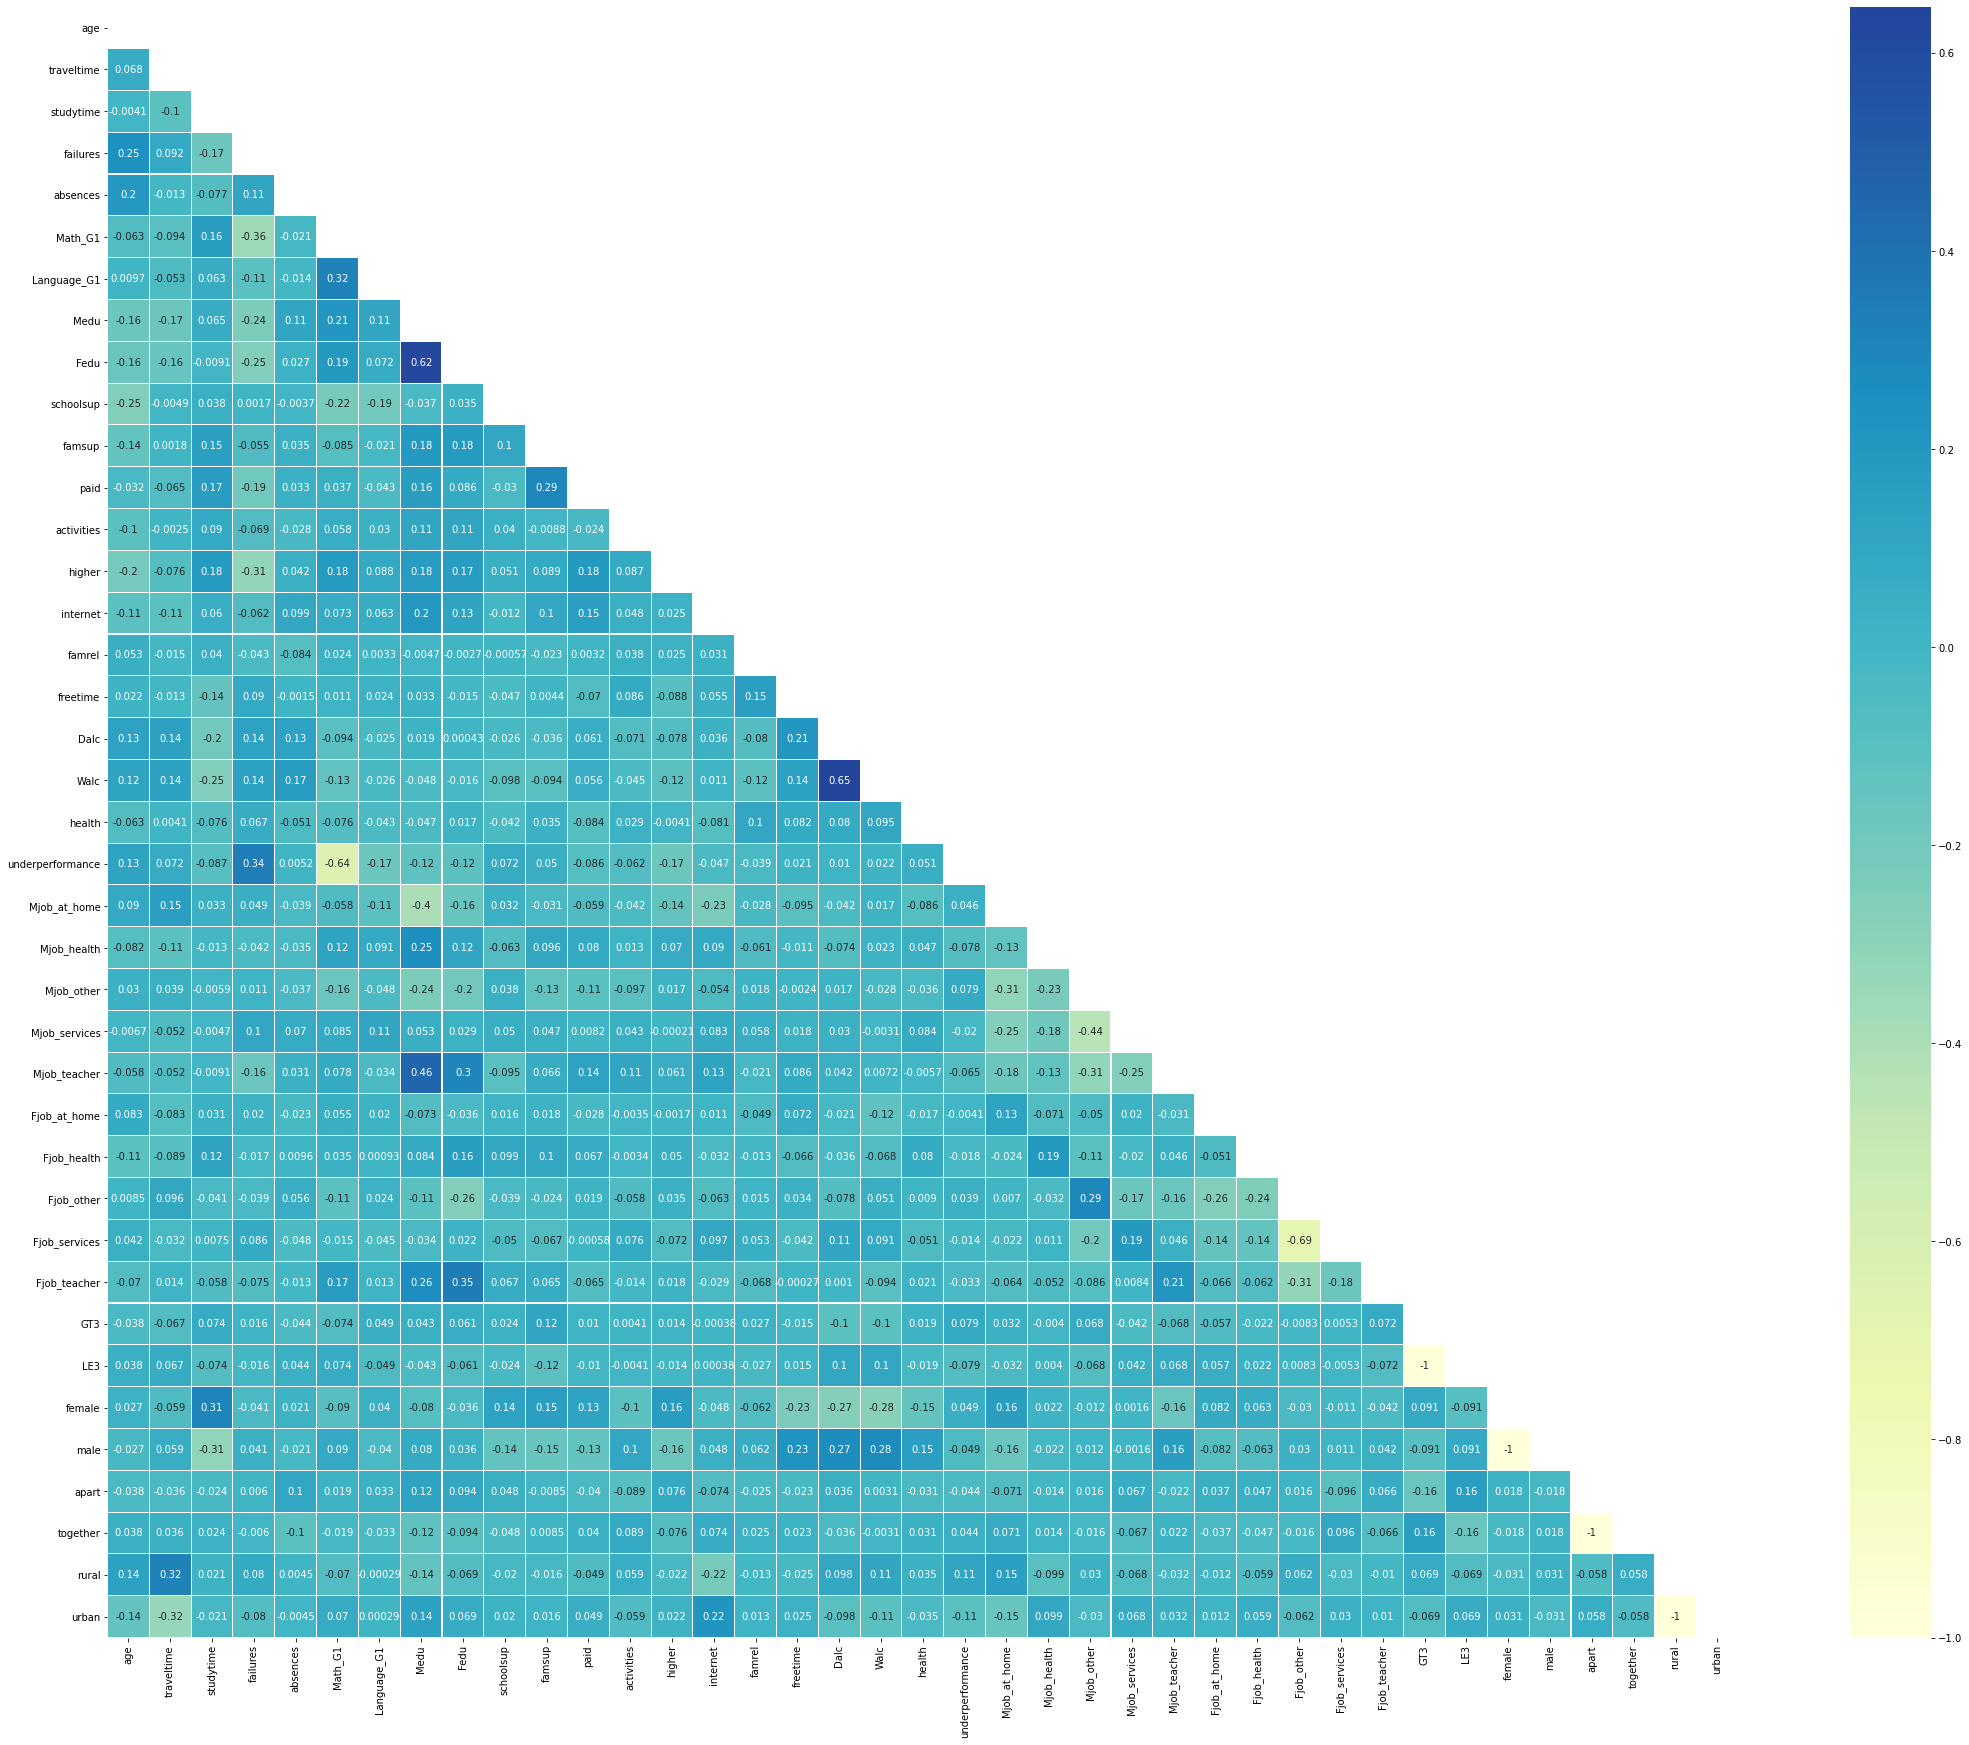

In [16]:
fig,ax = plt.subplots(1,1,figsize=(40,30))
corr_matrix = df.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, square=True, linewidth=0.1, cmap="YlGnBu", ax=ax, annot=True, center=0)

#### The more extreme the color, the higher the absolute value of the correlation between those 2 attributes. Allows us to easily scan and hone in on which values we should look at, and which ones to not even bother looking at.

## Normalize numerical features if needed

### We'll use the maximum absolute scaling technique for normalization. This will allow us to modify all the columns, since  it is the simplest. Source: https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475

In [10]:
#create an abs_scaler object
abs_scaler = MaxAbsScaler()
# calculate the maximum absolute value for scaling the data using the fit method
abs_scaler.fit(df)
# the maximum absolute values calculated by the fit method
abs_scaler.max_abs_
# transform the data using the parameters calculated by the fit method (the maximum absolute values)
scaled_data = abs_scaler.transform(df)
# store the results in a data frame
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df = df_scaled

## Models

### Logistic Regression Model: no G1Lang, no G1Math

#### Split into training and testing sets

In [11]:
XArray = df[df.columns.difference(['Math_G1','Language_G1', 'underperformance'])].values
YArray = df['underperformance'].values
X = XArray.reshape(-1, 36)
Y = YArray.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(XArray, Y, test_size=0.2, random_state=0)

#### Build Model

In [12]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

#### Check their model performance

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.26582278481012656
Mean Squared Error: 0.26582278481012656
Root Mean Squared Error: 0.5155800469472481
R-squared: -0.3229665071770331


### Perform cross-validations

<AxesSubplot:xlabel='trial'>

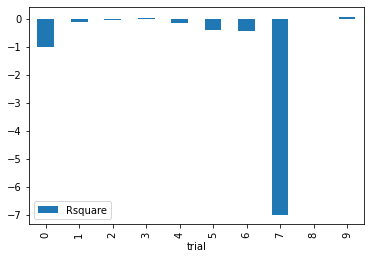

In [14]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

### This is an unreliable model as it does not even remotely pass cross validation. The model is basically random in the sense of you have no idea of how it will work at all. This is why we need cross validation, to make sure that it wasn't a fluke. And it was.

### Logistic Regression Model: G1Lang, no G1Math

#### Split into training and testing sets

In [15]:
XArray = df[df.columns.difference(['Math_G1', 'underperformance'])].values
YArray = df['underperformance'].values
X = XArray.reshape(-1, 37)
Y = YArray.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(XArray, Y, test_size=0.2, random_state=0)

In [16]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

### Check their model performance

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.24050632911392406
Mean Squared Error: 0.24050632911392406
Root Mean Squared Error: 0.49041444627368397
R-squared: -0.19696969696969657


### Perform cross-validations

<AxesSubplot:xlabel='trial'>

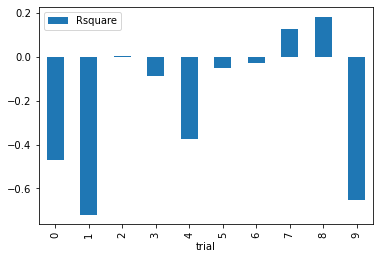

In [18]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

### This is an unreliable model as it does not even remotely pass cross validation. The model is basically random in the sense of you have no idea of how it will work at all. This is why we need cross validation, to make sure that it wasn't a fluke. And it was. We can't say that including the language attribute helped our model since the resulting model is still terrible.

### Logistic Regression Model: no G1Lang, G1Math
### Split into training and testing datasets

In [25]:
XArray = df[df.columns.difference(['Language_G1', 'underperformance'])].values
YArray = df['underperformance'].values
X = XArray.reshape(-1, 37)
Y = YArray.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(XArray, Y, test_size=0.2, random_state=0)

In [26]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

### Check Model performance

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.1518987341772152
Mean Squared Error: 0.1518987341772152
Root Mean Squared Error: 0.3897418814769785
R-squared: 0.24401913875598114


### Perform cross validation

<AxesSubplot:xlabel='trial'>

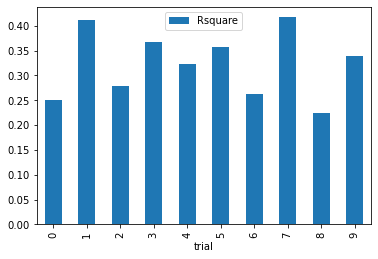

In [31]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

### This is an unreliable model as it does not pass cross validation. The model is basically random in the sense of you have no idea of how it will work at all. This is why we need cross validation, to make sure that it wasn't a fluke. And it was. We can't say that including the language attribute helped our model since the resulting model is still terrible. This is so even though we included the math midterm grade which should be very inidicitive of underperformance or not

### Logistic Regression Model: G1Lang, G1Math

In [19]:
XArray = df[df.columns.difference(['underperformance'])].values
YArray = df['underperformance'].values
X = XArray.reshape(-1, 38)
Y = YArray.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(XArray, Y, test_size=0.2, random_state=0)

In [20]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

### Check their model performance

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.17721518987341772
Mean Squared Error: 0.17721518987341772
Root Mean Squared Error: 0.42096934552698456
R-squared: 0.11802232854864458


### Performed cross-validations

<AxesSubplot:xlabel='trial'>

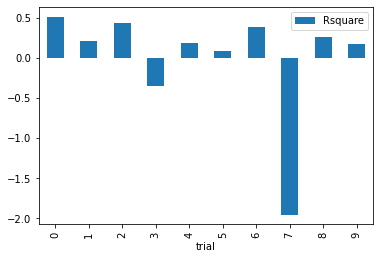

In [22]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

### This is an unreliable model as it does not even remotely pass cross validation. The model is basically random in the sense of you have no idea of how it will work at all. This is why we need cross validation, to make sure that it wasn't a fluke. And it was. And even when we included the math score, which we know should be indicitive of underperformance or not, we still get a terrible model.
### What is worth noting through the 3 logistic models is that even when we included the G1 Math score we still got a really bad model. What this indicates is that the data does not follow any sort of line through space. What we should probably use is a more sophisticated modeling technique.

## We will first look at models where we don't include the math midterm grade and see if the language midterm grade is relevant for determining underperformance or not.
## Decision tree: no G1Lang, no G1Math

### What we are looking for here is to see how much improvement we get by including the language parameter.

In [34]:
criterias=['gini','entropy']
for d in range(2,6):
    for c in criterias:
        # Split into training and testing sets
        XArray = df[df.columns.difference(['Math_G1', 'Language_G1', 'underperformance'])].values
        YArray = df['underperformance'].values
        X = XArray.reshape(-1, 36)
        Y = YArray.reshape(-1,1)
        X_train, X_test, Y_train, Y_test = train_test_split(XArray, Y, test_size=0.2, random_state=0)
        
        # Build the model
        model = DecisionTreeClassifier(max_depth=d, criterion=c)
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        
        # Check their model performance
        print('---------------------------------')
        print('depth: '+str(d) + '\t' + 'criterion: ' + c +'\n')
        print(confusion_matrix(Y_test,predictions))
        print(classification_report(Y_test,predictions))
        print(accuracy_score(Y_test, predictions))

---------------------------------
depth: 2	criterion: gini

[[57  0]
 [17  5]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        57
           1       1.00      0.23      0.37        22

    accuracy                           0.78        79
   macro avg       0.89      0.61      0.62        79
weighted avg       0.83      0.78      0.73        79

0.7848101265822784
---------------------------------
depth: 2	criterion: entropy

[[57  0]
 [17  5]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        57
           1       1.00      0.23      0.37        22

    accuracy                           0.78        79
   macro avg       0.89      0.61      0.62        79
weighted avg       0.83      0.78      0.73        79

0.7848101265822784
---------------------------------
depth: 3	criterion: gini

[[53  4]
 [15  7]]
              precision    recall  f1-score   support

           0 

### What seems to be the best choice here using the criteria of gini with a depth of 4. This is so sicne it still has a comparable accuracy (~0.81) score while having one of the higher f1 score for predicting 1.0 (underperformance) with ~0.5. All the models are very good at predicting if someone will perform well, but is not good at predicting if someone will underperform. There seems to be the maximum purity at a depth of 4.
### I think it is fascinating that this is one of the 2% of cases where there is a difference between the gini function and the entropy (information gain) split functions. (see this paper: https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf) I also think it is worth noting that how with using a decision tree, and not using either the language or math score we still got better results than with using both attributes and the linear regression model.

## Decision tree: G1Lang, no G1Math
### Our goal here is to see if including the language midterm score will improve our model

In [35]:
criterias=['gini','entropy']
for d in range(2,6):
    for c in criterias:
        # Split into training and testing sets
        XArray = df[df.columns.difference(['Math_G1', 'underperformance'])].values
        YArray = df['underperformance'].values
        X = XArray.reshape(-1, 37)
        Y = YArray.reshape(-1,1)
        X_train, X_test, Y_train, Y_test = train_test_split(XArray, Y, test_size=0.2, random_state=0)
        
        # Build the model
        model = DecisionTreeClassifier(max_depth=d, criterion=c)
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        
        # Check their model performance
        print('---------------------------------')
        print('depth: '+str(d) + '\t' + 'criterion: ' + c +'\n')
        print(confusion_matrix(Y_test,predictions))
        print(classification_report(Y_test,predictions))
        print(accuracy_score(Y_test, predictions))

---------------------------------
depth: 2	criterion: gini

[[57  0]
 [17  5]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        57
           1       1.00      0.23      0.37        22

    accuracy                           0.78        79
   macro avg       0.89      0.61      0.62        79
weighted avg       0.83      0.78      0.73        79

0.7848101265822784
---------------------------------
depth: 2	criterion: entropy

[[57  0]
 [17  5]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        57
           1       1.00      0.23      0.37        22

    accuracy                           0.78        79
   macro avg       0.89      0.61      0.62        79
weighted avg       0.83      0.78      0.73        79

0.7848101265822784
---------------------------------
depth: 3	criterion: gini

[[53  4]
 [15  7]]
              precision    recall  f1-score   support

           0 

### What seems to be the best choice here using the criteria of gini with a depth of 5. This is so sicne it still has a comparable accuracy (~0.78) score while having a  higher 1 score for predicting 1.0 (underperformance) with ~0.54. All the models are very good at predicting if someone will perform well, but is not good at predicting if someone will underperform. All of these models are very good at predicting if someone will not underperform
### I would say that including the language score does not improve the model, if anything it might make it slightly worse, so we might as well leave it out (makes the computation a little simpler). We can therefore safely conclude that when we don't include the math midterm score that the anguage grade will not be useful or not in determining the final Math grade 

## We will now look at models where we include the math midterm score, and see if in these models the language midterm makes a difference in underperformance or not
## Decision tree: no G1Lang, G1Math

In [38]:
criterias=['gini','entropy']
for d in range(2,6):
    for c in criterias:
        # Split into training and testing sets
        XArray = df[df.columns.difference(['Language_G1', 'underperformance'])].values
        YArray = df['underperformance'].values
        X = XArray.reshape(-1, 37)
        Y = YArray.reshape(-1,1)
        X_train, X_test, Y_train, Y_test = train_test_split(XArray, Y, test_size=0.2, random_state=0)
        
        # Build the model
        model = DecisionTreeClassifier(max_depth=d, criterion=c)
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        
        # Check their model performance
        print('---------------------------------')
        print('depth: '+str(d) + '\t' + 'criterion: ' + c +'\n')
        print(confusion_matrix(Y_test,predictions))
        print(classification_report(Y_test,predictions))
        print(accuracy_score(Y_test, predictions))

---------------------------------
depth: 2	criterion: gini

[[57  0]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        57
           1       1.00      0.59      0.74        22

    accuracy                           0.89        79
   macro avg       0.93      0.80      0.83        79
weighted avg       0.90      0.89      0.88        79

0.8860759493670886
---------------------------------
depth: 2	criterion: entropy

[[57  0]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        57
           1       1.00      0.59      0.74        22

    accuracy                           0.89        79
   macro avg       0.93      0.80      0.83        79
weighted avg       0.90      0.89      0.88        79

0.8860759493670886
---------------------------------
depth: 3	criterion: gini

[[53  4]
 [11 11]]
              precision    recall  f1-score   support

           0 

### The best model here is gini with a depth of 2. It has a really good f1 score of 0.88. The f1 score is also not biased towards underperformance or not underperformacne as  It is incredibly good at predicting not underperformance with an f1 score of 0.93 and is pretty good at predicting underperformance with an f1 score of 0.74. But we should remember that we are including the math midterm score since it won't be available at the beginning of the school year. (I chose gini as better since it is a little less computationally heavy than entropy).

## Decision tree: G1Lang, G1Math

In [39]:
criterias=['gini','entropy']
for d in range(2,6):
    for c in criterias:
        # Split into training and testing sets
        XArray = df[df.columns.difference(['underperformance'])].values
        YArray = df['underperformance'].values
        X = XArray.reshape(-1, 38)
        Y = YArray.reshape(-1,1)
        X_train, X_test, Y_train, Y_test = train_test_split(XArray, Y, test_size=0.2, random_state=0)
        
        # Build the model
        model = DecisionTreeClassifier(max_depth=d, criterion=c)
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        
        # Check their model performance
        print('---------------------------------')
        print('depth: '+str(d) + '\t' + 'criterion: ' + c +'\n')
        print(confusion_matrix(Y_test,predictions))
        print(classification_report(Y_test,predictions))
        print(accuracy_score(Y_test, predictions))

---------------------------------
depth: 2	criterion: gini

[[57  0]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        57
           1       1.00      0.59      0.74        22

    accuracy                           0.89        79
   macro avg       0.93      0.80      0.83        79
weighted avg       0.90      0.89      0.88        79

0.8860759493670886
---------------------------------
depth: 2	criterion: entropy

[[57  0]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        57
           1       1.00      0.59      0.74        22

    accuracy                           0.89        79
   macro avg       0.93      0.80      0.83        79
weighted avg       0.90      0.89      0.88        79

0.8860759493670886
---------------------------------
depth: 3	criterion: gini

[[53  4]
 [11 11]]
              precision    recall  f1-score   support

           0 

### The best model here is the gini criteria with a depth of 2. It has the highest f1 score with ~0.89 and also has an excellent f1 score for predicting not underperformance with 0.93. It also has a very good f1 score for predicting underperformance with 0.74. However, this model does include the math midterm score, which as we expected, is very indicitive of whether a student will underperform or not.
### We should also note how as we increase the depth of the decision tree, the worse and worse the models get. What this indicates is that at greater depths it is overfitting the data greatly. We also see how the purity for the entropy criterion is the same for depths 4 and 5.
### However, the results for including and not including the language midterm score when we included the math midterm score are virtually identical. We can therefore claim that the language grade will not be useful or not in determining the final Math grade.

### Now to return to our question of find out if the language grade will be useful or not in determining the final Math grade: We cannot use the logistic regression models to determine this, as the data does not fit it at all. So we resorted to using decision trees.
### Once we opted to use decision trees, we further broke down the scenario into 2 cases: including the math midterm score and excluding it. As mentioned by each set of models, there does not appear to be any improvement in our models by including the language midterm score. Therefore we can claim that overall the language midterm score will not be useful or not in determining the final Math grade.